In [1]:
# 기본
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 경고가 뜨지 않도록..
import warnings
warnings.filterwarnings('ignore')

# 그래프 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
# plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['font.size'] = 16
plt.rcParams['figure.figsize'] = 20, 10
plt.rcParams['axes.unicode_minus'] = False

# 출력 창 청소
from IPython.display import clear_output

import time


# 평가함수
# 분류용
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

# 회귀용
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

# 딥러닝
import tensorflow as tf

# 딥러닝 모델 구조를 정의하는 것
from tensorflow.keras.models import Sequential
# 층 모델(은닉층과 출력층)
from tensorflow.keras.layers import Dense
# 활성화 함수를 정의하는 것
from tensorflow.keras.layers import Activation

# 데이터 표준화
from sklearn.preprocessing import StandardScaler
# 문자열을 숫자로 변환
from sklearn.preprocessing import LabelEncoder
# 원핫인코딩
from tensorflow.keras.utils import to_categorical

# 학습데이터와 검증데이터로 나눈다
from sklearn.model_selection import train_test_split

# K폴드 교차검증
from sklearn.model_selection import KFold

# 저장된 모델을 복원
from tensorflow.keras.models import load_model

# epoch 마다 저장하기 위해 사용
from tensorflow.keras.callbacks import ModelCheckpoint
# 조기중단을 위해 사용
from tensorflow.keras.callbacks import EarlyStopping

# GPU 할당
gpus = tf.config.experimental.list_physical_devices('GPU')
# GPU가 있다면..
if len(gpus) > 0 :
    try :
        for gpu in gpus :
            tf.config.experimental.set_memory_growth(gpu, True)
    except RuntimeError as e :
        print(e)


In [2]:
# 랜덤 시드 설정
np.random.seed(1)
tf.random.set_seed(1)

In [3]:
df1 = pd.read_csv('data/wine.csv', header=None)
df1

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,0
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,0
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,0
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,0


In [4]:
df1.info() # 문자열 확인

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       6497 non-null   float64
 1   1       6497 non-null   float64
 2   2       6497 non-null   float64
 3   3       6497 non-null   float64
 4   4       6497 non-null   float64
 5   5       6497 non-null   float64
 6   6       6497 non-null   float64
 7   7       6497 non-null   float64
 8   8       6497 non-null   float64
 9   9       6497 non-null   float64
 10  10      6497 non-null   float64
 11  11      6497 non-null   int64  
 12  12      6497 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 660.0 KB


In [5]:
df1.isna().sum() # 결측치 확인

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
dtype: int64

In [6]:
# 입력과 결과로 나눈다.
X = df1.drop(12, axis=1)
y = df1[12]

display(X)
display(y)

,0,1,2,3,4,5,6,7,8,9,10,11
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


0       1
1       1
2       1
3       1
4       1
       ..
6492    0
6493    0
6494    0
6495    0
6496    0
Name: 12, Length: 6497, dtype: int64

In [7]:
# 데이터 표준화 
scaler1 = StandardScaler()
scaler1.fit(X)
X = scaler1.transform(X)
X

array([[ 0.14247327,  2.18883292, -2.19283252, ...,  0.19309677,
        -0.91546416, -0.93722961],
       [ 0.45103572,  3.28223494, -2.19283252, ...,  0.99957862,
        -0.58006813, -0.93722961],
       [ 0.45103572,  2.55330026, -1.91755268, ...,  0.79795816,
        -0.58006813, -0.93722961],
       ...,
       [-0.55179227, -0.6054167 , -0.88525328, ..., -0.47897144,
        -0.91546416,  0.20799905],
       [-1.32319841, -0.30169391, -0.12823371, ..., -1.016626  ,
         1.9354021 ,  1.35322771],
       [-0.93749534, -0.78765037,  0.42232597, ..., -1.41986693,
         1.09691202,  0.20799905]])

In [8]:
# 모델 설정
model = Sequential()

a1 = X.shape[1]
model.add(Dense(30, input_dim=a1))
model.add(Activation('relu'))

model.add(Dense(12))
model.add(Activation('relu'))

model.add(Dense(8))
model.add(Activation('relu'))

model.add(Dense(1))
model.add(Activation('sigmoid'))


In [9]:
# 학습 모델을 생성한다
model.compile(loss='binary_crossentropy', optimizer='adam', 
              metrics=['accuracy'])

In [10]:
# 모델들이 저장될 파일명
# epoch : 학습 횟수
# val_loss : 검증 데이터 손실률
path1 = 'model/19/{epoch}-{val_loss}.h5'
path2 = 'model/19/최종.h5'

# 저장 콜백 설정
# save_best_only : True로 설정하면 개선이 되었을 때만 저장한다.
call1 = ModelCheckpoint(filepath=path1, monitor='val_loss', 
                        save_best_only=True)
call2 = ModelCheckpoint(filepath=path2, monitor='val_loss',
                        save_best_only=True)

# 조기 중단 콜백
# patience: 개선이 된 이후 몇 번을 더 볼 것인가를 설정.
# 이 횟수 동안 개선이 되지 않으면 중단.
call3 = EarlyStopping(monitor = 'val_loss', patience=50)

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                   random_state=1)


In [12]:
# 학습한다.
history = model.fit(X_train, y_train, epochs=2000, batch_size=500, 
          validation_data=[X_test, y_test],
          callbacks=[call1, call2, call3])



Epoch 1/2000
11/11 [==============================] - 1s 25ms/step - loss: 0.6886 - accuracy: 0.5472 - val_loss: 0.6492 - val_accuracy: 0.7562
Epoch 2/2000
11/11 [==============================] - 0s 12ms/step - loss: 0.6241 - accuracy: 0.8282 - val_loss: 0.5829 - val_accuracy: 0.9000
Epoch 3/2000
11/11 [==============================] - 0s 11ms/step - loss: 0.5573 - accuracy: 0.9024 - val_loss: 0.5093 - val_accuracy: 0.9231
Epoch 4/2000
11/11 [==============================] - 0s 11ms/step - loss: 0.4801 - accuracy: 0.9211 - val_loss: 0.4250 - val_accuracy: 0.9362
Epoch 5/2000
11/11 [==============================] - 0s 12ms/step - loss: 0.3937 - accuracy: 0.9440 - val_loss: 0.3367 - val_accuracy: 0.9538
Epoch 6/2000
11/11 [==============================] - 0s 12ms/step - loss: 0.3072 - accuracy: 0.9636 - val_loss: 0.2548 - val_accuracy: 0.9638
Epoch 7/2000
11/11 [==============================] - 0s 11ms/step - loss: 0.2291 - accuracy: 0.9740 - val_loss: 0.1887 - val_accuracy: 0.9777

Epoch 58/2000
11/11 [==============================] - 0s 13ms/step - loss: 0.0153 - accuracy: 0.9971 - val_loss: 0.0320 - val_accuracy: 0.9938
Epoch 59/2000
11/11 [==============================] - 0s 13ms/step - loss: 0.0151 - accuracy: 0.9971 - val_loss: 0.0319 - val_accuracy: 0.9938
Epoch 60/2000
11/11 [==============================] - 0s 13ms/step - loss: 0.0149 - accuracy: 0.9971 - val_loss: 0.0319 - val_accuracy: 0.9938
Epoch 61/2000
11/11 [==============================] - 0s 8ms/step - loss: 0.0148 - accuracy: 0.9973 - val_loss: 0.0319 - val_accuracy: 0.9938
Epoch 62/2000
11/11 [==============================] - 0s 13ms/step - loss: 0.0147 - accuracy: 0.9973 - val_loss: 0.0316 - val_accuracy: 0.9938
Epoch 63/2000
11/11 [==============================] - 0s 15ms/step - loss: 0.0145 - accuracy: 0.9971 - val_loss: 0.0315 - val_accuracy: 0.9938
Epoch 64/2000
11/11 [==============================] - 0s 14ms/step - loss: 0.0144 - accuracy: 0.9971 - val_loss: 0.0314 - val_accuracy: 

Epoch 115/2000
11/11 [==============================] - 0s 7ms/step - loss: 0.0090 - accuracy: 0.9981 - val_loss: 0.0298 - val_accuracy: 0.9954
Epoch 116/2000
11/11 [==============================] - 0s 7ms/step - loss: 0.0090 - accuracy: 0.9981 - val_loss: 0.0297 - val_accuracy: 0.9954
Epoch 117/2000
11/11 [==============================] - 0s 7ms/step - loss: 0.0089 - accuracy: 0.9981 - val_loss: 0.0297 - val_accuracy: 0.9954
Epoch 118/2000
11/11 [==============================] - 0s 7ms/step - loss: 0.0088 - accuracy: 0.9981 - val_loss: 0.0297 - val_accuracy: 0.9954
Epoch 119/2000
11/11 [==============================] - 0s 7ms/step - loss: 0.0087 - accuracy: 0.9981 - val_loss: 0.0298 - val_accuracy: 0.9954
Epoch 120/2000
11/11 [==============================] - 0s 7ms/step - loss: 0.0087 - accuracy: 0.9981 - val_loss: 0.0297 - val_accuracy: 0.9954
Epoch 121/2000
11/11 [==============================] - 0s 7ms/step - loss: 0.0086 - accuracy: 0.9981 - val_loss: 0.0296 - val_accuracy:

In [13]:
# 모델을 복원한다.
model2 = load_model(path2)
model2


In [14]:
a1 = model2.evaluate(X_test, y_test) # 저장한 파일이 맞는지 확인
print(f'손실률 : {a1[0]}')
print(f'정확도 : {a1[1]}')


41/41 [==============================] - 0s 3ms/step - loss: 0.0294 - accuracy: 0.9954
손실률 : 0.029397455975413322
정확도 : 0.9953846335411072


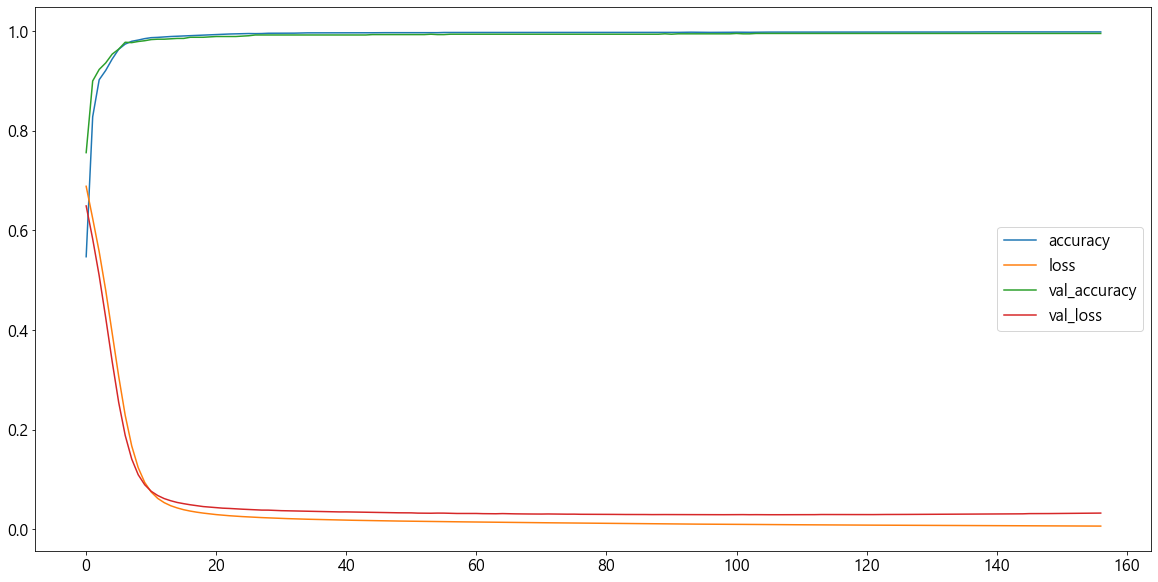

In [15]:
# 오차 정도와 정확도를 그래프로 그린다.
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()
plt.show()
